
# Connect Intensive - Machine Learning Nanodegree
# Lesson 03: Building and evaluating models with `sklearn`
# Part 01: Exploratory data analysis & preprocessing

## Objectives
  - Perform exploratory data analysis on a data set to determine relevant features to include in a model.
  - Tidy a data set so that all features will be compatible with [the `sklearn` library](http://scikit-learn.org/stable/).
      - Change categorical (object) variables to numeric with either [`pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) or [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
      - Impute missing or null values with [label-based indexing (`loc`)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)
  - Save cleaned datasets (so that we don't lose our hard preprocessing work!)
  
## Prerequisites
  - You should have the following python packages installed:
    - [matplotlib](http://matplotlib.org/index.html)
    - [numpy](http://www.scipy.org/scipylib/download.html)
    - [pandas](http://pandas.pydata.org/getpandas.html)
    - [sklearn](http://scikit-learn.org/stable/install.html)
  - If you're rusty on exploratory data analysis using `pandas`, you may want to check out lessons 01 and 02 in the [ConnectIntensive repo](https://github.com/nickypie/ConnectIntensive)


## Acknowledgements
  - This lesson is adapted from part 1 of Thomas Corcoran's excellent [`sklearn` tutorial](https://github.com/tccorcoran/Connect/tree/master/sklearn-tutorial). Thank you Thomas!

## Getting Started
As usual, we start by importing some useful libraries and modules. Don't worry if you get a warning message when importing `matplotlib` -- it just needs to build the font cache, and the warning is just to alert you that this may take a while the first time the cell is run.

**Run** the cell below to import useful libraries for this notebook.

In [1]:
%matplotlib inline
try:
    import matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    print("Successfully imported matplotlib.pyplot! (Version {})".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib.pyplot!")
    
try:
    import numpy as np
    print("Successfully imported numpy! (Version {})".format(np.version.version))
except ImportError:
    print("Could not import numpy!")
    
try:
    import pandas as pd
    print("Successfully imported pandas! (Version {})".format(pd.__version__))
    pd.options.display.max_rows = 10
except ImportError:
    print("Could not import pandas!")

try:
    from IPython.display import display
    print("Successfully imported display from IPython.display!")
except ImportError:
    print("Could not import display from IPython.display")
    
try:
    import sklearn
    print("Successfully imported sklearn! (Version {})".format(sklearn.__version__))
    skversion = int(sklearn.__version__[2:4])
except ImportError:
    print("Could not import sklearn!")

Successfully imported matplotlib.pyplot! (Version 1.5.3)
Successfully imported numpy! (Version 1.11.1)
Successfully imported pandas! (Version 0.18.1)
Successfully imported display from IPython.display!
Successfully imported sklearn! (Version 0.17.1)


## A familiar dataset
By this point, you've probably explored the Titanic Survival dataset. The goal of this notebook is to demonstrate how we can leverage the predictive models from [**scikit-learn**](http://scikit-learn.org/stable/) (`sklearn`): an open source, commercially usable collection of simple, efficient tools for data mining & analysis. [Kaggle](https://www.kaggle.com/) has the [Titanic Survival dataset available](https://www.kaggle.com/c/titanic/data), and have already split the set into training and testing data for us. Note for their testing data, they have omitted the `'Survived'` feature.

**Run** the cell below (**click** on the cell to highlight it, then press **shift + enter** or **shift + return** to run it) to read the training and testing data into `pandas` `DataFrame` objects.

In [2]:
train_df = pd.read_csv("lesson-03-data/titanic_train.csv")
test_df  = pd.read_csv("lesson-03-data/titanic_test.csv")
print("Titanic data sets loaded!")

Titanic data sets loaded!


## Exploratory Data Analysis

**Run** the cell below to display the first few rows of `train_df`:

In [3]:
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The key feature we will attempt to predict is the `'Survived'` feature, which is equal to 0 or 1 for a passenger who died or survived, respectively, from the Titanic sinking. Let's do some exploratory data analysis to learn more about the data set.

If you're already comfortable with exploratory data analysis in `pandas`, and want to move on to prediction with the `sklearn` library, feel free to skip ahead to the **Readying the data for `sklearn`** section of this notebook.

# Exercises - Exploratory Data Analysis
If you need a refresher on using `pandas` for exploratory data analysis, please check out lessons 01 and 02 in the [ConnectIntensive repo](https://github.com/nickypie/ConnectIntensive)!

## Question 1
How many people in `train_df` survived? How many people did not survive?

In [4]:
len(train_df.Survived)

891

## Question 2
How many females were in the dataset? How many females survived?

In [5]:
len(train_df[train_df.Sex=='female'])

314

For questions 3-6, you may want to consult the following code demos:

**Run** the cell below to generate a bar plot with the number of passengers from each port of embarkation (`'Embarked'`)

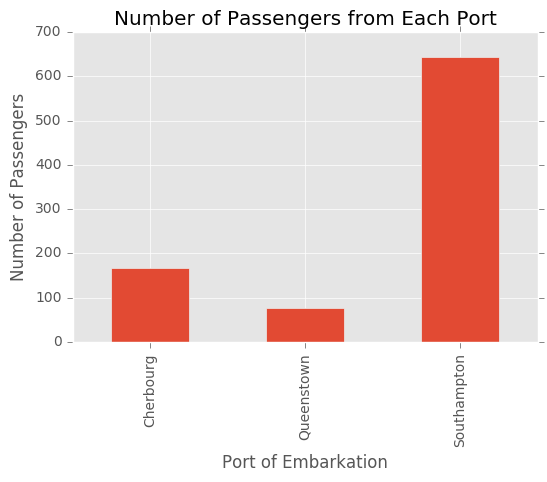

In [6]:
# Demo code -- generate a bar plot of number of passengers from each port of embarkation

ax = train_df\
    .groupby('Embarked')\
    .count()['PassengerId']\
    .plot(kind='bar')
xlab   = plt.xlabel('Port of Embarkation')
xticks = plt.xticks(range(3),['Cherbourg','Queenstown','Southampton'])
ylab   = plt.ylabel('Number of Passengers')
title  = plt.title('Number of Passengers from Each Port')

**Run** the cell below to generate a bar plot with the number of surviving and deceased passengers from each port of embarkation (`'Embarked'`)

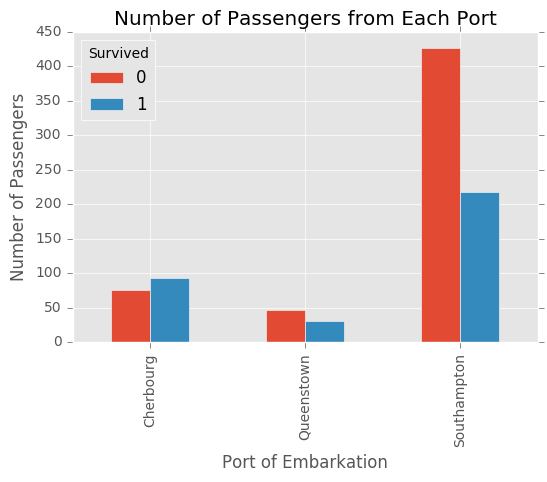

In [7]:
# Demo code -- generate a bar plot of number of surviving and deceased passengers from each port of embarkation

ax = train_df\
    .groupby(['Embarked','Survived'])\
    .count()['PassengerId']\
    .unstack('Survived')\
    .plot(kind='bar')
xlab   = plt.xlabel('Port of Embarkation')
xticks = plt.xticks(range(3),['Cherbourg','Queenstown','Southampton'])
ylab   = plt.ylabel('Number of Passengers')
title  = plt.title('Number of Passengers from Each Port')

## Question 3
Using the first bar plot above, from which port did the most passengers embark? ...the fewest passengers?

## Question 4
Using the second bar plot above, of the passengers who embarked from Cherbourg, were there more surviving or deceased passengers? ...what about from Queenstown? ...from Southampton?

## Question 5
Make a bar plot of the number of passengers in each class (`'Pclass'`). Which class had the most passengers? the fewest?

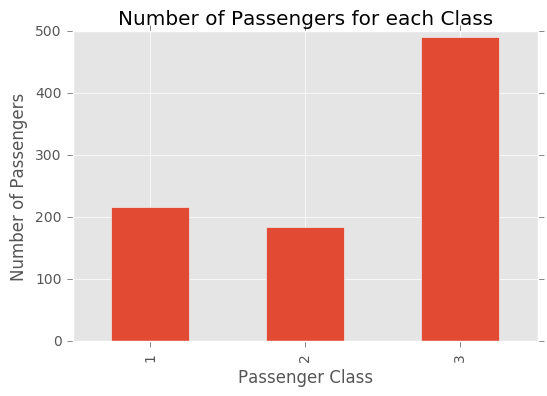

In [10]:
ax = train_df\
    .groupby(['Pclass'])\
    .count()['PassengerId']\
    .plot(kind='bar')
xlab   = plt.xlabel('Passenger Class')
ylab   = plt.ylabel('Number of Passengers')
title  = plt.title('Number of Passengers for each Class')

## Question 6
Make a bar plot with the number of surviving and deceased passengers from each class (`'Pclass'`). Of the first-class passengers, were there more surviving or deceased passengers? ...what about the second-class passengers? ...the third-class passengers?

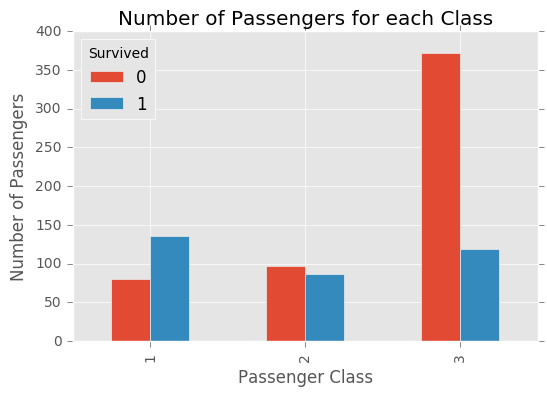

In [16]:
ax = train_df\
    .groupby(['Pclass','Survived'])\
    .count()['PassengerId']\
    .unstack('Survived')\
    .plot(kind='bar')
xlab   = plt.xlabel('Passenger Class')
ylab   = plt.ylabel('Number of Passengers')
title  = plt.title('Number of Passengers for each Class')

## Readying the data for `sklearn`
By using the method [`train_df.info()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html), we can concisely summarize the DataFrame, and get an idea of whether any columns have missing values. Additionally, many machine learning tools, including the models in `sklearn` library, will only accept numbers as input. This may be a problem if our data includes categorical features (e.g. `'Sex'`, `'Embarked'`) with the data type `object`. 

**Run** the cell below to see the summary for `train_df`, and think about the following questions:
  - How many instances (rows) are in the `DataFrame`?
  - Are there any features (columns) that appear to have missing values?
  - Are there any non-numeric features?

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Looking at the output of `train_df.info()`, we can see that there are 891 instances (AKA entries or rows) in the `DataFrame`. The columns `'Age'`, `'Cabin'`, and `'Embarked'` are the only three features with missing or null values. Additionally, there are five non-numeric features: `'Name'`, `'Sex'`, `'Ticket'`, `'Cabin'`, and `'Embarked'`.

When you're approaching problems like a machine learnist, you should always start with a well-posed problem in mind. The question I'd like to answer here with ML techniques is *"Can we predict whether or not a passenger aboard the Titanic survived using the other features present in the Titanic data set?"* Based on my exploratory data analysis, I'd like to build a predictive model using the following features:
  - `'Pclass'`: Passenger's class (1 = first; 2 = second; 3 = third)
  - `'Sex'`: Passenger's sex (male or female)
  - `'Age'`: Passenger's age
  - `'SibSp'`: Number of passenger's siblings/spouses aboard
  - `'Parch'`: Number of passenger's parents/children aboard
  - `'Embarked'`: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

From your own exploratory data analysis, you may have selected a different set of features to answer the question -- that's okay! For now, let's use these features going forward. For the most part, this group of features is ready to go, but in order to use all of these features with `sklearn`, we need to do the following:
  1. Change `'Sex'` to a numeric feature... it's currently `dtype object` with **two** distinct categories
  2. Change `'Embarked'` to a numeric feature... it's currently `dtype object` with **three** distinct categories
  3. Impute (fill in) any missing or null values from `'Age'`, `'Embarked'`

## Two ways to get numeric features: `pandas.Series.map()` and `pandas.get_dummies()`
[The method `pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) can take a Python dictionary as a parameter or argument. The keys of the dictionary are the current entries in the `Series` object, while the values of the dictionary are the new desired entries for the `Series` object. For example, consider the `'Sex'` feature. We'd like to map the two genders, `'female'` and `'male'`, to numbers, e.g. 0 and 1.

**Run** the cell below to use `Series.map()` to map the genders `'female'` and `'male'` to 0 and 1, respectively, then display the first few rows of the `DataFrame` object, and the `dtype`, to show that the `'Sex'` feature is now numeric.

In [18]:
train_df['Sex'] = train_df['Sex'].map( {'female': 0, 'male': 1, 0:0, 1:1} )
display(train_df.head())
display(train_df['Sex'].dtype)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


dtype('int64')

That worked great! Maybe we could do the same with the `'Embarked'` feature? Consider the dictionary:

`{'C':0,'Q':1,'S':2}`

Using this dictionary and `Series.map()`, we could map the `'Embarked'` feature to numerical values. However, this imparts some ordinality (or ordering) to the `'Embarked'` feature. Does it make sense to say that Cherbourg < Queenstown < Southampton? Not really! In the case where we have a categorical feature like `'Embarked'` with 3 or more distinct but unordered categories, it is better to use [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) and to turn the original feature into dummy variables (AKA indicator variables). To do this, we will use [the method `pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html):

For more information about why to use one-hot encoding, you can check out [this Quora post](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) for a brief synopsis.

**Run** the cell below to see what the dummy variables for the `Series` object `train_df['Embarked']` look like!

In [19]:
train_dummies = pd.get_dummies(train_df['Embarked'])
display(train_dummies)

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


The original categorical variable `Embarked` had three distinct categories: `C` for Cherbourg, `Q` for Queenstown, and `S` for Southampton. By calling `pandas.get_dummies(train_df['Embarked'])`, we get a `DataFrame` object where the number of columns corresponds to the number of distinct categories in the `Series` object. Each column is called a **dummy variable** or an **indicator variable**. The names of the dummy variables are simply the categories from the original `Series` object. The values of the dummy variable `C` are 1 in the rows where `'Embarked'` is equal to `C`, and 0 otherwise.

Another helpful hint: we could rename the dummy variables so that they're a bit more descriptive. Renaming is also useful if the category names are very long. We can pass in to the `columns` argument a Python dictionary object, where the keys are the old column names and the values are the new column names.

**Run** the cell below to rename the features to the full name of the port of embarkation using [the method `pandas.DataFrame.rename()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html):

In [20]:
train_dummies = train_dummies.rename(columns={'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})
display(train_dummies)

,Cherbourg,Queenstown,Southampton
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


Now we can **concatenate** the two data frames `train_df` and `train_dummies` using [the method `pandas.concat()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html). By default, `concat()` wants to append two `DataFrame` objects one below the other, but we want to append the `DataFrame` objects side by side. To do this, we need to add the argument `axis=1`.

**Run** the cell below to concatenate (combine) `train_df` and `train_dummies` and print the result! Note, the `if` statement ensures that we don't concatenate the dummies more than once if you run the cell multiple times.

In [21]:
if 'Cherbourg' not in list(train_df.columns):
    train_df = pd.concat([train_df, train_dummies], axis=1)
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cherbourg,Queenstown,Southampton
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1.0,0.0,0.0


## The case of the missing values

Now that we've taken care of our two features of `dtype object`, we want to consider how to treat missing values. Let's start by checking `train_df.info()` again to remember where the missing values are lurking.

**Run** the cell below to summarize `train_df`. There should be a few new features, our dummy variables, from when we called `pd.concat()` earlier.

In [22]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Cherbourg      891 non-null float64
Queenstown     891 non-null float64
Southampton    891 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 104.5+ KB


None

So we need to deal with the missing values in `'Age'` and `'Embarked'`, but it looks like the three dummy variables that we got from `'Embarked'` (`'Cherbourg'`, `'Queenstown'`, and `'Southampton'`) have no missing values! Let's investigate further...

**Run** the cell below to slice the DataFrame, keeping only the instances where `train_df['Embarked']` has a missing value using [the method `pandas.Series.isnull()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isnull.html). What are the values of the dummy variables for this slice?

In [23]:
train_df[train_df['Embarked'].isnull()][['Embarked','Cherbourg','Queenstown','Southampton']]

,Embarked,Cherbourg,Queenstown,Southampton
61,NaN,0.0,0.0,0.0
829,NaN,0.0,0.0,0.0


It looks like the method `pandas.get_dummies()` is no dummy! The indicator variables are **all** zero for instances  (rows) where the source of the indicator variables, `'Embarked'`, is null.

All that's left is deciding how to [impute the missing values](https://en.wikipedia.org/wiki/Imputation) for the feature `train_df['Age']`. Imputation is a pretty tricky topic -- we saw in the optional exercises at the end of `lesson-02.ipynb` that adding additional values to a dataset with missing values could change the predictions from a ML algorithm. The library `sklearn` has [an `Imputer` class](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values) that you may use to fill in missing values. In fact, [the entire `sklearn.preprocessing` package](http://scikit-learn.org/stable/modules/preprocessing.html) has useful methods for prepping a dataset for the `sklearn` libraries. For now, let's try imputation by hand -- in the future, you're welcome to poke around in the `Imputer` class to find additional ways to replace missing values.

**Run** the cell below to compute the mean of the `Series` object `train_df['Age']`. Note that the default behavior for [the method `pandas.Series.mean()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html) is to skip null values, so setting the parameter `skipna=True` isn't necessary.

In [24]:
mean_age = train_df['Age'].mean(skipna=True)
print("mean age: {:.1f}".format(mean_age))

mean age: 29.7


Our imputation strategy is to replace the `'Age'` feature with the mean age, in instances (rows) where that feature is null. This can be a little tricky.

**Run** the cell below to try to impute the missing `'Age'` values in `train_df`. Did it work as expected? What does `train_df.info()` tell you?

In [25]:
train_df[train_df['Age'].isnull()]['Age']=mean_age
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Cherbourg      891 non-null float64
Queenstown     891 non-null float64
Southampton    891 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 104.5+ KB


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


None

We get a warning, and `train_df['Age']` is still full of missing values!

`SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead`

We tried to assign values to a *copy* of the `Series` object! When we call `train_df[train_df['Age'].isnull()]['Age']`, it returns a *copy* of the sliced Series object `train_df['Age']`. So we tried to assign `mean_age` to every value in that copy, rather than in the appropriate location in the original `DataFrame` object. We need to use label-based indexing with `loc`, which we introduced in lesson-01.ipynb.

For a recap on indexing and selecting data, [check this out](http://pandas.pydata.org/pandas-docs/stable/indexing.html)!

**Run** the cell below to properly impute the missing `'Age'` values. Recall that `loc` is label-based indexing, while `iloc` is integer-based indexing. Our `row_indexer` is the boolean `Series` object `train_df['Age'].isnull()`. Our `column_indexer` is simply the label-based index `'Age'`.

In [26]:
train_df.loc[train_df['Age'].isnull(),'Age'] = mean_age
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Cherbourg      891 non-null float64
Queenstown     891 non-null float64
Southampton    891 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 104.5+ KB


None

One nice feature about imputing missing values using the mean: after imputation, the mean is unchanged! However, imputation may change other summary statistics, particularly the standard devation. Also, there's no hard and fast rule for imputation -- we could have imputed missing values with, say, the median if the mean were heavily influenced by outliers.

Anyway, it looks like we've properly tidied the training data! All features that we want to use for prediction are rid of missing or null values. We should also keep in mind that if we build a model on the preprocessed or tidied training data, we need to perform **identical** preprocessing on the testing data set! The model we build will not work on the raw testing data because the model will incorporate features that don't yet exist in the testing set (e.g. `'Cherbourg'`, `'Queenstown'`, and `'Southampton'`).

**Run** the cell below to preprocess the test data set identically to how we preprocessed the training data set.


In [27]:
# Step 1: Use .map to convert the 'Sex' feature to numeric dtype
test_df['Sex'] = test_df['Sex'].map( {'female': 0, 'male': 1, 0:0, 1:1} )

# Step 2: Use .get_dummies to convert the 'Sex' feature to numeric dtype
test_dummies = pd.get_dummies(test_df['Embarked'])
test_dummies = test_dummies.rename(columns={'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})
if 'Cherbourg' not in list(test_df.columns):
    test_df = pd.concat([test_df, test_dummies], axis=1)
    
# Step 3: Impute missing values in the 'Age' feature with mean_age
test_df.loc[test_df['Age'].isnull(),'Age'] = mean_age

print("test data preprocessed!")

test data preprocessed!


## Save the preprocessed data
Now that we've preprocessed and cleaned the training and testing datasets, we want to save our progress so that we don't have to repeat preprocessing.

**Run** the cell below to write the training and testing DataFrame objects to csv files using [the method `pandas.DataFrame.to_csv()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html). Note, from [the module `os.path`](https://docs.python.org/2/library/os.path.html) we import the method `isfile`, which allows us to check whether the file already has been saved.

In [28]:
from os.path import isfile
train_cleaned_filename = "lesson-03-data/titanic_train_cleaned.csv"
test_cleaned_filename  = "lesson-03-data/titanic_test_cleaned.csv"
if not isfile(train_cleaned_filename):
    train_df.to_csv(train_cleaned_filename)
    print("Cleaned Titanic training data set saved!")
else:
    print("Cleaned Titanic training data set already saved!")
    
if not isfile(test_cleaned_filename):
    test_df.to_csv(test_cleaned_filename)
    print("Cleaned Titanic testing data set saved!")
else:
    print("Cleaned Titanic testing data set already saved!")

Cleaned Titanic training data set saved!
Cleaned Titanic testing data set saved!


In part 02 of this lesson, we will build predictive models using `sklearn`. See you there!